# CoronaVirus Prediction Dashboard
_by Marco Nardon_

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
#------ INIZIO IMPORTAZIONE DATI

#Download dataframe nazionale da GitHub Protezione Civile
df_naz = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')
df_naz['data'] = pd.to_datetime(df_naz['data'])

In [3]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

In [4]:
x_data = np.asarray(df_naz.index.values)
y_data = np.asarray(df_naz['totale_casi'])

In [5]:
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [6]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 7.592691, beta_2 = 0.633617


In [7]:
beta_1 = popt[0]
beta_2 = popt[1]
tot = len(xdata)
x = np.linspace(0, 1, tot)
y = sigmoid(x, *popt)
y_hat = y * max(y_data)

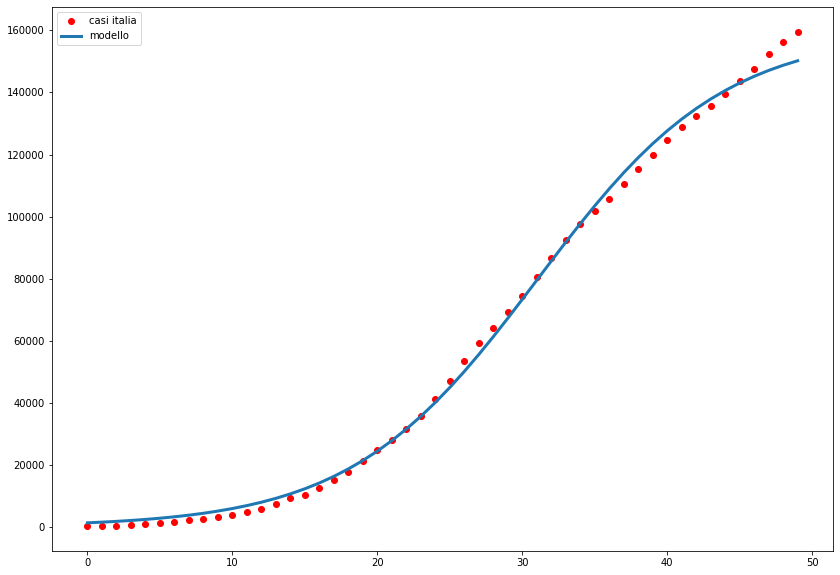

In [8]:
plt.figure(figsize=(14,10))
plt.plot(x_data, y_data, 'ro', label='casi italia')
plt.plot(x_data, y_hat, linewidth=3.0, label='modello')
plt.legend(loc='best')
plt.show()

In [9]:
beta_1 = popt[0]
beta_2 = popt[1]
ymax = max(y_data)

##TOGLIERE COMMENTI PER GIOCARE SUL MODELLO

#ymax = 145000
#beta_1 = 7.981814
#beta_2 = 0.664267

pred_length = 1.5
x_pred_max = int(tot * pred_length)
x_pred = np.linspace(0, pred_length, x_pred_max)
y_pred = sigmoid(x_pred, beta_1, beta_2)

x_pred_ext = np.arange(len(y_pred))

y_pred_ext = y_pred * ymax

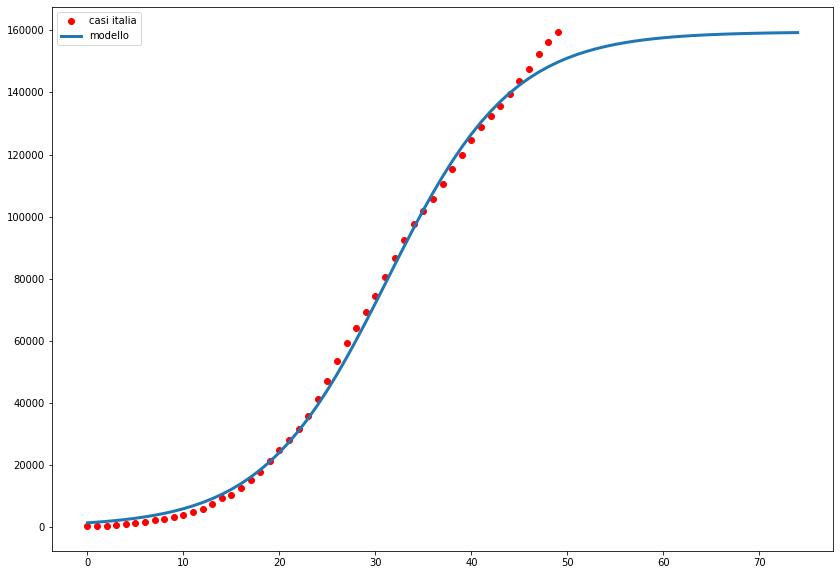

In [10]:
plt.figure(figsize=(14,10))
plt.plot(x_data, y_data, 'ro', label='casi italia')
plt.plot(x_pred_ext, y_pred_ext, linewidth=3.0, label='modello')
plt.legend(loc='best')
plt.show()

In [2]:
!pip3 install plotly==4.6.0

     |████████████████████████████████| 7.1 MB 1.8 MB/s eta 0:00:01     |▌                               | 122 kB 1.8 MB/s eta 0:00:04
    Running setup.py install for retrying ... done


In [3]:
import plotly.graph_objects as go

In [4]:
fig = px.line(df_naz, x="data", y="totale_casi", title='Totale casi in Italia')
fig.show()

NameError: name 'px' is not defined